# Plotting
Author: Javier Duarte

## Plotting in `pyROOT`
Here we do standard plotting in `pyROOT`

Welcome to JupyROOT 6.26/06


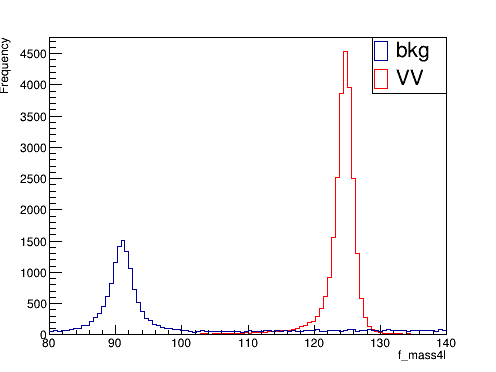

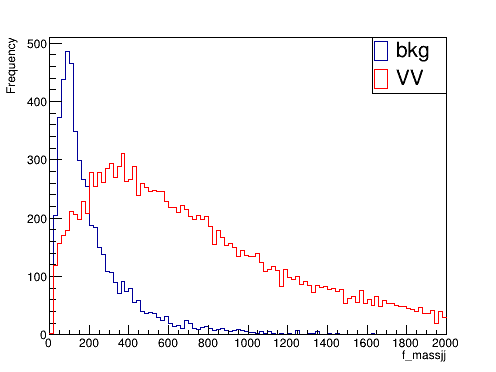

In [1]:
import ROOT as rt
rt.gStyle.SetOptTitle(0)
rt.gStyle.SetOptStat(0)

treename = 'HZZ4LeptonsAnalysisReduced'

tfile = {}
tree = {}
hist = {}
tfile['VV'] = rt.TFile.Open('data/ntuple_4mu_VV.root')
tfile['bkg'] = rt.TFile.Open('data/ntuple_4mu_bkg.root')
tree['VV'] = tfile['VV'].Get(treename)
tree['bkg'] = tfile['bkg'].Get(treename)

hist['VV_f_mass4l'] = rt.TH1D('VV_f_mass4l','VV_f_mass4l',100, 80, 140)
hist['bkg_f_mass4l'] = rt.TH1D('bkg_f_mass4l','bkg_f_mass4l',100, 80, 140)

tree['VV'].Project('VV_f_mass4l','f_mass4l') 
tree['bkg'].Project('bkg_f_mass4l','f_mass4l')

hist['VV_f_massjj'] = rt.TH1D('VV_f_massjj','VV_f_massjj',100, 0, 2000)
hist['bkg_f_massjj'] = rt.TH1D('bkg_f_massjj','bkg_f_massjj',100, 0, 2000)

tree['VV'].Project('VV_f_massjj','f_massjj')
tree['bkg'].Project('bkg_f_massjj','f_massjj')

hist['VV_f_mass4l'].SetLineColor(rt.kRed)
hist['VV_f_massjj'].SetLineColor(rt.kRed)

%jsroot off
c1 = rt.TCanvas('c1','c1',500,400)
hist['VV_f_mass4l'].GetXaxis().SetTitle('f_mass4l')
hist['VV_f_mass4l'].GetYaxis().SetTitle('Frequency')
hist['VV_f_mass4l'].Draw('hist')
hist['bkg_f_mass4l'].Draw('same')


legend = rt.TLegend(0.75,0.75,0.9,0.9)
legend.AddEntry(hist['bkg_f_mass4l'], ' bkg', 'f')
legend.AddEntry(hist['VV_f_mass4l'], ' VV', 'f')
legend.Draw()

c1.Draw()

c2 = rt.TCanvas('c2','c2',500,400)
hist['bkg_f_massjj'].GetXaxis().SetTitle('f_massjj')
hist['bkg_f_massjj'].GetYaxis().SetTitle('Frequency')
hist['bkg_f_massjj'].Draw('hist')
hist['VV_f_massjj'].Draw('same')

legend.Draw()

c2.Draw()